Decision Tree Classification

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [26]:
inputs=df.drop('salary_more_then_100k',axis='columns')

In [27]:
target=df['salary_more_then_100k']

In [28]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()


In [29]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_company.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])
inputs


,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [30]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')

In [31]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [32]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs_n,target,test_size=0.2)

In [34]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [35]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
model.score(X_test,y_test)

0.5

is salary of google, computer Engineer, Bachelor degree>100k?

In [37]:
model.predict([[2,1,0]])

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

is salary of google,computer Eng, master degree > 100k?


In [38]:
model.predict([[2,1,1]])


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

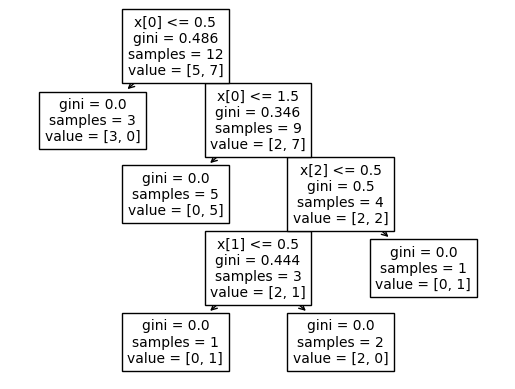

In [40]:
tree.plot_tree(model);